<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Diego1733/blob/main/Sep29-30/Sep29_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MONTECARLO


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random

data1 = np.loadtxt("/content/drive/MyDrive/ML2023/olympic100m_men (1).txt", delimiter=',').T
x = np.array(data1[0])
y = np.array(data1[1])



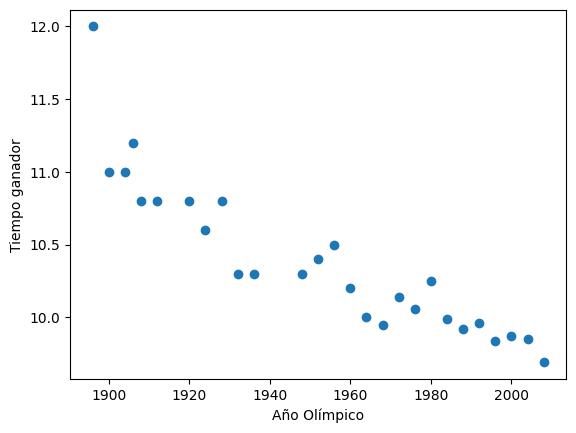

In [7]:
plt.scatter(x, y)
plt.xlabel("Año Olímpico")
plt.ylabel("Tiempo ganador")
plt.show()

In [42]:
#Función costo:
def Model(x, y, w):
  # Función costo inicial f = w0 + w1 x
  f_wb = w[0] * x + w[1]
  # Función costo del algoritmo (f - y) ^ 2
  cost = np.sum((f_wb - y) ** 2)
  return cost

def Likelihood(costo, sigma):
    return np.sum(costo - (2 * (sigma ** 2)))

def Prior(xmin, xmax, prop):
  for i in prop:
    if xmax > i  and xmin < i:
      return np.log(1)
    else:
      return np.log(0)

def Posterior(likelihood, prior):
  return likelihood + prior



In [43]:
#Valores iniciales:
xmax = np.max(x)
xmin = np.min(x)
sigma = 1
#iniciales
xi = [1, 2]
xm = np.mean(x)
w = [36, 0]
gaus0 = np.random.normal(xi[0], sigma, 1000)
gaus1 = np.random.normal(xi[0], sigma, 1000)
#propuesta
prop = [gaus0, gaus1]

if (Posterior(Likelihood(Model(x, y, w), sigma), Prior(xmin, xmax, prop))) >  (Posterior(Likelihood(Model(x, y, w), sigma), Prior(xmin, xmax, xi))):
  xi = prop
else:
  r = random(0, 1)
  if (Posterior(Likelihood(Model(x, y, w), sigma), Prior(xmin, xmax, prop))) / (Posterior(Likelihood(Model(x, y, w), sigma), Prior(xmin, xmax, xi))) > r:
    xi = prop
  xi = xi





ValueError: ignored